# Preprocessing

### Imported libraries

In [90]:
#SSS
import pandas as pd
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statistics
import numpy as np
import statistics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor      
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVR
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Loading data

In [91]:
#SSS
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

### Printing data example

In [3]:
#prikaz podataka
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


### Showing data types

In [4]:
#Tipovi podataka
data.dtypes
#ocigledno ce biti potrebna konverzija nekih podataka

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

### Showing data info

In [5]:
#informacije o podacima
data.info()
#imamo informaciju o tome da nema null podataka

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Checking for missing values

In [6]:
#provera da li ima missing values
data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

### Dropping duplicates

In [7]:
#brisanje duplikata
data.duplicated(subset=None, keep='first')
#data.drop_duplicates(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Length: 48204, dtype: bool

### Scaling 'clouds_all' data

In [ ]:
# scaler = MinMaxScaler()

#     #Scaling cloud data
# data[['clouds_all']] = scaler.fit_transform(data[['clouds_all']])
#     #Scaling of temperature data
# data[['temp']]=scaler.fit_transform(data[['temp']])

# Descriptive analytics

In [8]:
    #1 Mean of rain in millimeters per one hour 

averageRain = data['rain_1h'].mean()
print("Average rain per 1h: " + str(averageRain)) 

    #2 Mean of traffic volume 
averageTrafficVolume = data['traffic_volume'].mean()
print("Average traffic volume: " + str(averageTrafficVolume)) 

    #Harmonic mean
hmean = statistics.harmonic_mean(data['traffic_volume'])
print("Harmonic mean traffic volume: " + str(hmean)) 

    #3 Median of falling snow in 1h
medianSnow = data['snow_1h'].median()
print("Median snow on 1h: ", medianSnow)

    #4 Median of traffic volume
medianTrafficVolume = data['traffic_volume'].median()
print("Median traffic volume: " + str(medianTrafficVolume)) 

    #5 Standard deviation of traffic volume# the standard deviation summarizes how much your data differs from the mean.
standard_deviation = data['traffic_volume'].std()
print("Standard deviation of traffic volume: ", standard_deviation)

    #6 Standard deviation of temperature
standard_deviation = data['temp'].std()
print("Standard deviation of temp: ", standard_deviation)

#data.head(3000)
#data[['clouds_all']]

    #Converting temperature from Kelvin to Celsius
#data['Temperature'] = data['temp'].subtract(273.16)


    #Output sMinimum and Maximum Temperature
minTemp = data['temp'].min()
maxTemp = data['temp'].max()
print("Minimum temperature: ", minTemp, "Maximum temperature: ", maxTemp)

    #range of data - difference between inimum and maximum
rangee=np.ptp(data['traffic_volume'])
print("range guzve je:", rangee)

rangee=np.ptp(data['temp'])
print("range temperature je:", rangee)



    #Mode
mode = data['traffic_volume'].mode()
print("Mode of traffic volume: ", mode)

variance = statistics.variance(data['traffic_volume'])
print("Variance of traffic volume: ", variance)

Average rain per 1h: 0.33426396149697535
Average traffic volume: 3259.8183553232097
Harmonic mean traffic volume: 0
Median snow on 1h:  0.0
Median traffic volume: 3380.0
Standard deviation of traffic volume:  1986.8606704463552
Standard deviation of temp:  13.338231912676283
Minimum temperature:  0.0 Maximum temperature:  310.07
range guzve je: 7280
range temperature je: 310.07
Mode of traffic volume:  0    353
1    356
Name: traffic_volume, dtype: int64
Variance of traffic volume:  3947615.3237665542


### Describing target data

In [9]:
#opis podataka
#scipy describe
result = stats.describe(data['traffic_volume'], ddof=1, bias=False)
print(str(result))
#pandas describe
data.describe()

DescribeResult(nobs=48204, minmax=(0, 7280), mean=3259.8183553232097, variance=3947615.3237665547, skewness=-0.08938135143647916, kurtosis=-1.3090882117269556)


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


### Describing object data

In [10]:
#opis objekata

#pandas describe objects
data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


### Checking 'date_time' data

In [11]:
# pocetak i kraj zapisa podataka
print("Start :" +data['date_time'].max())
print("End :" +data['date_time'].min())

Start :2018-09-30 23:00:00
End :2012-10-02 09:00:00


### Checking 'weather_main' data by temperature

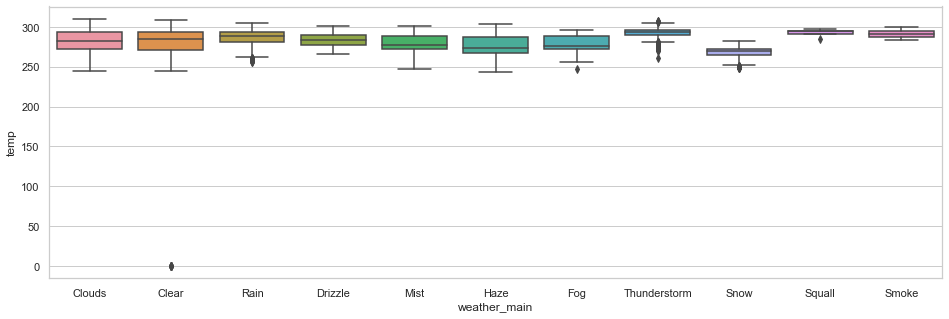

In [12]:
%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="weather_main", y="temp", data=data, orient="v")

### Pie plotting 'weather_description' data

<AxesSubplot:ylabel='weather_description'>

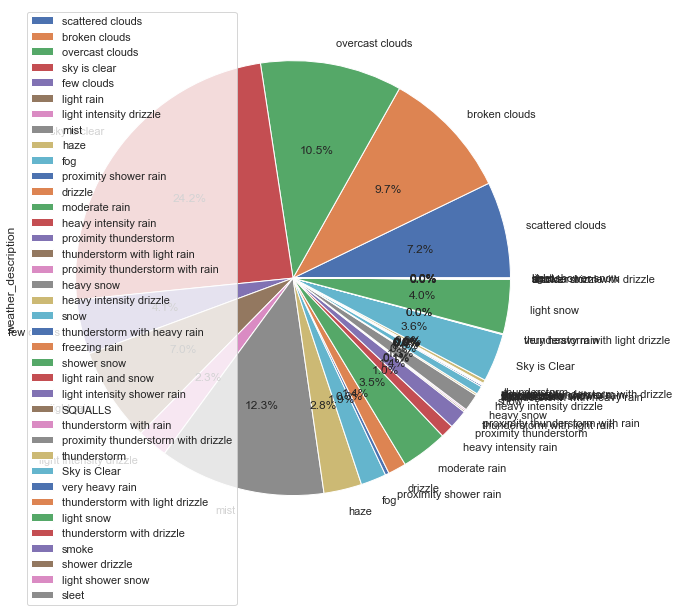

In [13]:
type_counts = data['weather_description'].value_counts()
df2 = pd.DataFrame({'weather_description': type_counts}, 
                     index = ['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
    'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze', 'fog',
    'proximity shower rain', 'drizzle', 'moderate rain', 'heavy intensity rain',
    'proximity thunderstorm', 'thunderstorm with light rain',
    'proximity thunderstorm with rain', 'heavy snow', 'heavy intensity drizzle',
    'snow', 'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
    'light rain and snow', 'light intensity shower rain', 'SQUALLS',
    'thunderstorm with rain', 'proximity thunderstorm with drizzle',
    'thunderstorm', 'Sky is Clear', 'very heavy rain',
    'thunderstorm with light drizzle', 'light snow',
    'thunderstorm with drizzle', 'smoke', 'shower drizzle', 'light shower snow',
    'sleet'])
df2.plot.pie(y='weather_description', figsize=(10,10), autopct='%1.1f%%')

### Countplotting holiday data

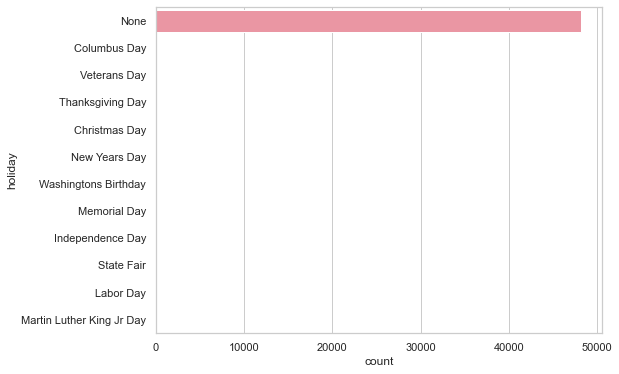

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = data)
plt.show()

### Countplotting holiday data excluding 'None'

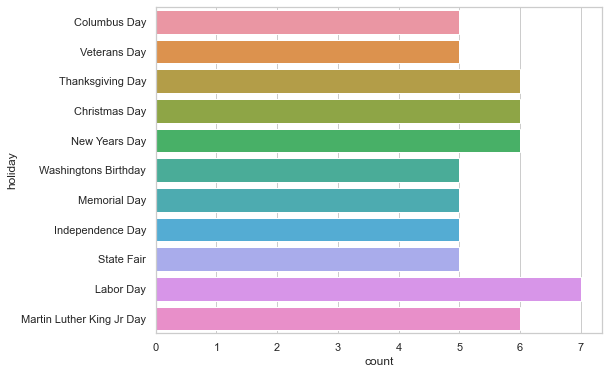

In [15]:
#'None' predstavlja problem, ali i resenje, jer ga ima mnogo vise od ostalih dana
holidays = data.loc[data['holiday'] != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()
#ovaj prikaz je znatno bolji i daje prikaz o praznicima, obzirom na to da su praznici svake godine na isti dan, jasno je da je broj slican

### Boxplotting temperature data

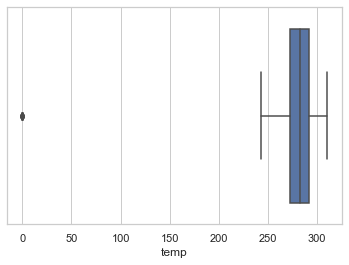

In [16]:
#prikaz podataka o temperaturi
plt.figure(figsize=(6,4))
sns.boxplot(x='temp', data = data)
plt.show()
#iz prikaza je jasno da postoji oversempling koji oze da utice na mean vrednost

### Temperature switch from Kelvin to Celsius 

In [ ]:
# prebacivanje temperature iz kelvina u celzius zato sto je celzius laksi za razumevanje, bar nama
#data['temp'] = (data['temp']-273.15)
#plt.figure(figsize=(6,4))
#sns.boxplot('temp', data = data)
#plt.show()

### Checking rain per 1h data

<Figure size 432x288 with 0 Axes>

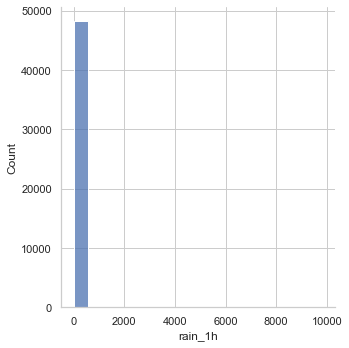

In [17]:
#prikaz podataka o kisi
plt.figure(figsize=(6,4))
sns.displot(data.rain_1h)
plt.show()
# iz prikazanog se vidi da su podaci sto se tice kise delom nekonzistentni, a i u atribut weather_main govori kada je kisa


### Checking rain per 1h less than 1

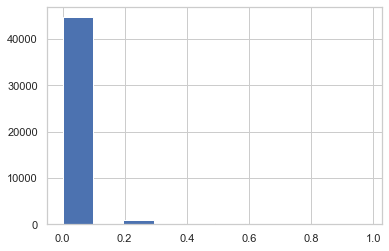

In [18]:
#histogram koji govori o padavimana i koliko u proseku padavina ima oko koje vrednosti
plt.hist(data.rain_1h.loc[data.rain_1h<1])
plt.show()
#jasan prikaz da uglavnom nema kise

### Checking snow per 1h

<Figure size 432x288 with 0 Axes>

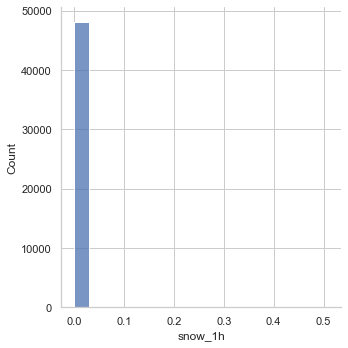

In [19]:
plt.figure(figsize=(6,4))
sns.displot(data.snow_1h)
plt.show()

### Checking rain per 1h data

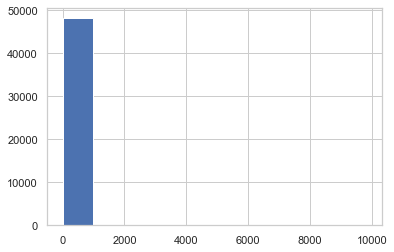

In [20]:
plt.hist(data.rain_1h.loc[data.snow_1h<1])
plt.show()

### Describing 'clouds_all' data

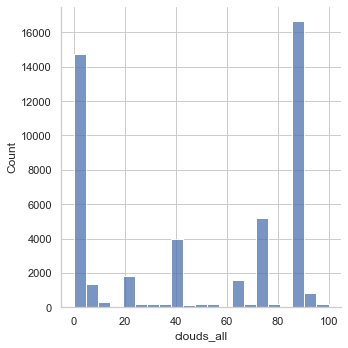

count    48204.000000
mean        49.362231
std         39.015750
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64

In [21]:
#oblacnost 
sns.displot(data.clouds_all)
plt.show()
data['clouds_all'].describe()

### Countplotting 'weather_main' data

<AxesSubplot:xlabel='count', ylabel='weather_main'>

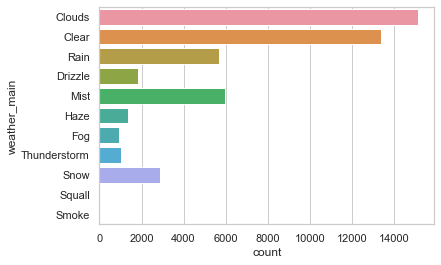

In [22]:
#prikaz podataka o tipovima vremena
sns.countplot(y='weather_main', data=data)

### Piechart of 'weather_main' data

<AxesSubplot:ylabel='Weather Type'>

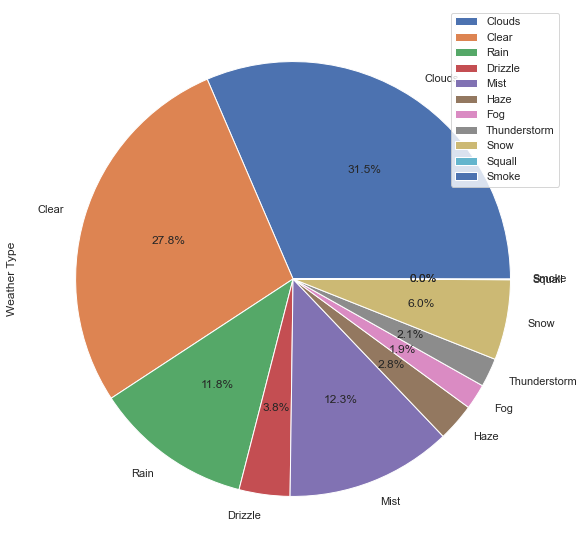

In [23]:

type_counts = data['weather_main'].value_counts()
df2 = pd.DataFrame({'Weather Type': type_counts}, 
                     index = ['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
                   )
df2.plot.pie(y='Weather Type', figsize=(10,10), autopct='%1.1f%%')

### Counting 'traffic_volume' data

<AxesSubplot:xlabel='traffic_volume', ylabel='Count'>

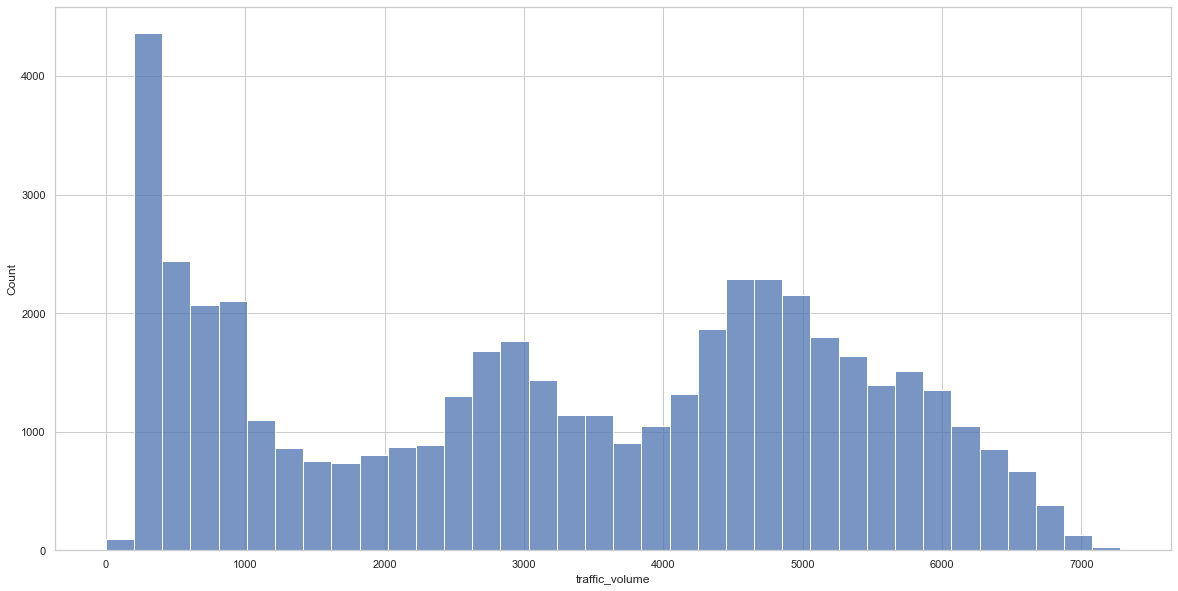

In [24]:
#histogram koji prikazuje vrednosti guzve izmedju vrednosti od minimalne do maksimalne
filter_data = data.dropna(subset=['traffic_volume'])
plt.figure(figsize=(20,10))
sns.histplot(filter_data['traffic_volume'], kde=False)
#sa histograma se vidi da je najvise vrednosti guzve izmedju 200 i 400

### Checking 'weather_description' data

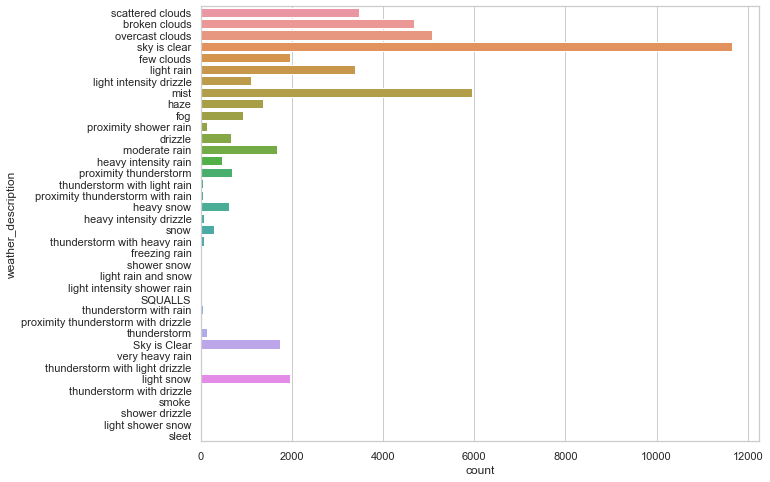

In [25]:
#opisi tipova vremena
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=data)
plt.show()
#jasno je da je opis tipova vremena feature koji je suvisan, jer vec postoji vremenska prilika

### Checking traffic volume for holidays

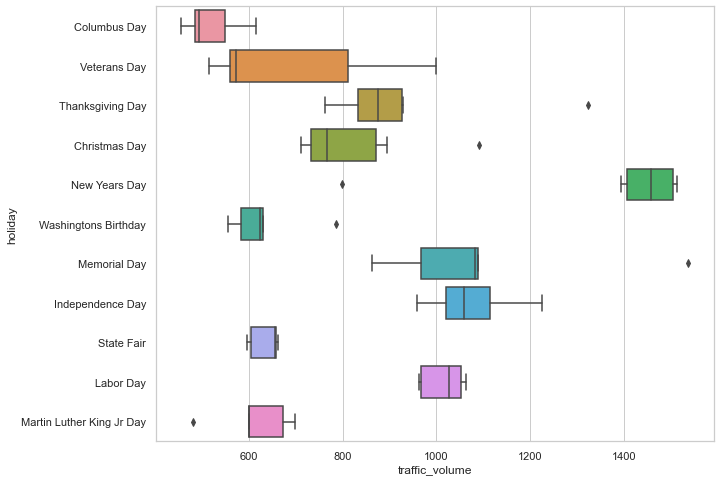

In [26]:
#poredjenje gustine saobracaja za praznike
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

### Traffic volume dependency by temperature

<Figure size 720x576 with 0 Axes>

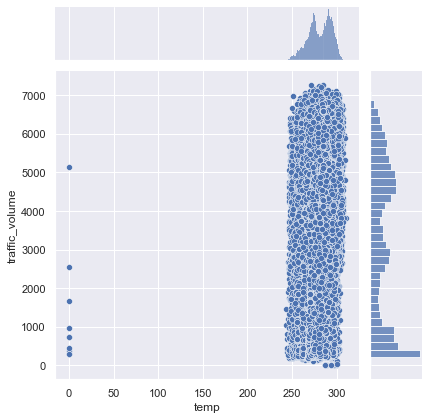

In [27]:
#zavisnost guzve od temperature
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = data.loc[data.temp>-50])
plt.show()

### Checking traffic volume dependency by clouds coverage of the sky 

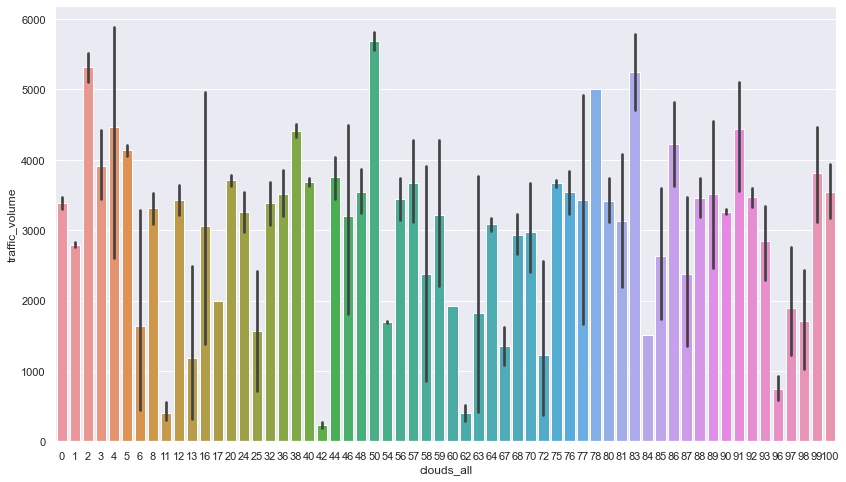

In [28]:
#prikaz zavisnosti guzve od oblacnosti 
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = data)
plt.show()

### Traffic volume dependency by weather type

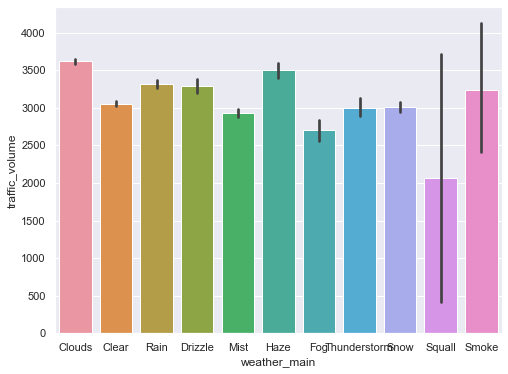

In [29]:
#prikaz zavisnosti guzve od tipa vremena
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = data)
plt.show()

### Corelation using heatmap

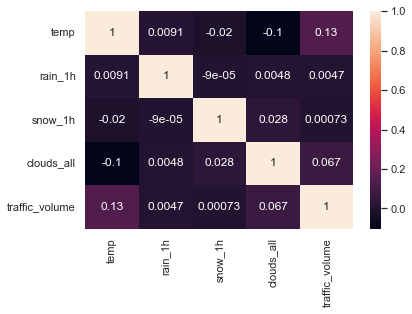

In [30]:
#trazenje jake korelacije izmedju guzve i nekog od feature-a, uz pomoc toplotne mape
sns.heatmap(data.corr(), annot=True)
plt.show()

### Checking correlation coefficient example

In [ ]:
corr_matrix = np.corrcoef(data['rain_1h'], data['clouds_all'])
print(corr_matrix)

# Preprocessing and cleaning data



In [92]:
#SSS
df = data.copy()
df['date_time'] = pd.to_datetime(df.date_time)
df['weekday'] = df.date_time.dt.weekday#dani u nedelji idu od 0 do 6, gde je ponedeljak 0..
df['date'] = df.date_time.dt.date
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


## Transforming hours to daytime period

In [ ]:
#prevodjenje tacnog vremena u objekte, tj kategoricke podatke 
#dokazano da nema poente ovo raditi
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df['hour'] = df.hour.map(hour_modify)
df.head(6)

## Transforming day to weekday type

In [93]:
#SSS
#prevodjenje dana u kategoricke podatke 
def day_modify(x):
    Weekend = [5, 6]
    WeekDay = [0, 1, 2 ,3 ,4]
    
    if x in WeekDay:
        return 'WeekDay'
    else:
        return 'Weekend'

df['weekday'] = df.weekday.map(day_modify)
df.head(6)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,9,10,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,10,10,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,11,10,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,12,10,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,13,10,2012
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,WeekDay,2012-10-02,14,10,2012


### Transforming months to quartals

In [33]:
#prevodjenje meseci u objekte
# Dokazano da su resultati losiji kada se meseci dele u kvartale
def month_modify(x):
    First_Quartal = [1,2,3]
    Second_Quartal = [4,5,6]
    Third_Quartal = [7,8,9]
    Fourth_Quartal = [10,11,12]
    if x in First_Quartal:
        return 'First_Quartal'
    elif x in Second_Quartal:
        return 'Second_Quartal'
    elif x in Third_Quartal:
        return 'Third_Quartal'
    else:
        return 'Fourth_Quartal'
    
df['month'] = df.month.map(month_modify)
df.head(6)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,9,Fourth_Quartal,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,10,Fourth_Quartal,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,11,Fourth_Quartal,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,12,Fourth_Quartal,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,13,Fourth_Quartal,2012
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,WeekDay,2012-10-02,14,Fourth_Quartal,2012


### Checking traffic volume in weekdays/weekends

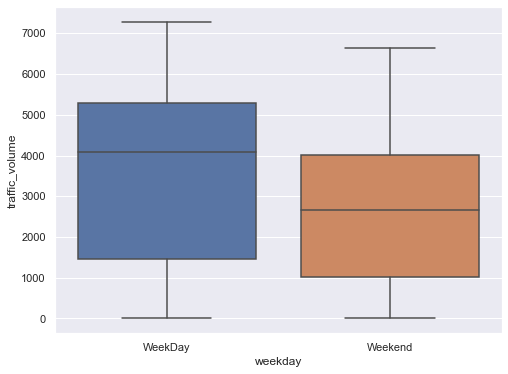

In [36]:
#Guzva za dane u nedelji
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df)
plt.show()

### Checking traffic volume per years

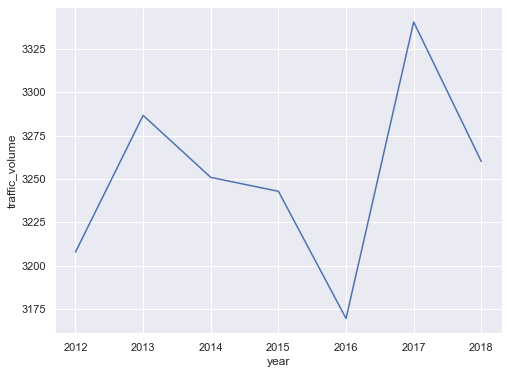

In [37]:
# prikaz guzve na godisnjem nivou
df_date_traffic = df.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic['traffic_volume'], data = df_date_traffic)
plt.show()

### Transforming holiday data

In [94]:
#SSS
#pretvaranje praznika u true ili false, dan ili jeste praznik ili nije
def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df['holiday'] = df['holiday'].map(modify_holiday)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,9,10,2012
1,False,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,10,10,2012
2,False,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,11,10,2012
3,False,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,12,10,2012
4,False,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,13,10,2012


### Dropping outliers from temperature data

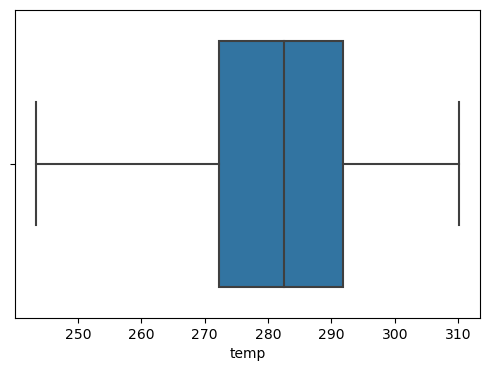

In [95]:
#SSS
#uklanjanje outliera
df = df.loc[df.temp>200]
#df['temp'] = (df['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot(x='temp', data = df)
plt.show()

## Checking traffic volume by holidays

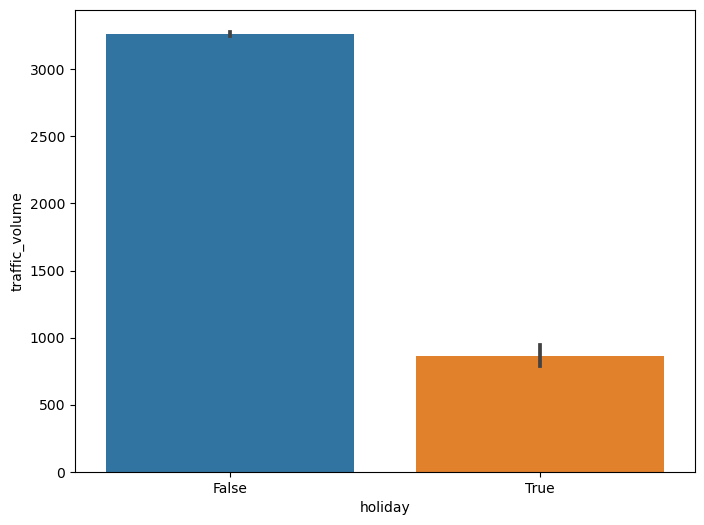

In [96]:
#razlika u guzvi kada je praznik i kada nije
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df)
plt.show()

### Dropping unnecessary columns

In [97]:
#SSS
#uklanjanje podataka o tome da li je kisa ili sneg jer se vec na osnovu parametra weather zna da li jeste ili nije
df.drop(columns = ['rain_1h','snow_1h', 'weather_description'],inplace = True)#note- moze da se prebaci i snow no snow u true i false, takodje i za kisu, ali nekako deluje kao da to vec znamo na osnovu tekucih vremennskih prilika
df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume,weekday,date,hour,month,year
0,False,288.28,40,Clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,9,10,2012
1,False,289.36,75,Clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,10,10,2012
2,False,289.58,90,Clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,11,10,2012
3,False,290.13,90,Clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,12,10,2012
4,False,291.14,75,Clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,13,10,2012


In [ ]:
#uklanjanje podataka o tome da li je kisa ili sneg jer se vec na osnovu parametra weather zna da li jeste ili nije
df.drop(columns = ['weather_description'],inplace = True)#note- moze da se prebaci i snow no snow u true i false, takodje i za kisu, ali nekako deluje kao da to vec znamo na osnovu tekucih vremennskih prilika
df.head()

### Counting weather condition rows

In [42]:
df['weather_main'].value_counts()

Clouds          15164
Clear           13381
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

### Merging similar weather conditions

In [98]:
#SSS
#vremenske prilike koje su slicne stavljene u isti tip
df.loc[df['weather_main'].str.contains('Haze'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Mist'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Smoke'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Squall'),'weather_main'] = 'Thunderstorm'       
df['weather_main'].value_counts()

Clouds          15164
Clear           13381
Fog              8242
Rain             5672
Snow             2876
Drizzle          1821
Thunderstorm     1038
Name: weather_main, dtype: int64

In [ ]:
# iskorisceno za testiranje algoritama
def modify_weather(x):
    if x == 'Clouds':
        return 0
    elif x== 'Clear':
        return 1
    elif x== 'Fog':
        return 2
    elif x== 'Rain':
        return 3
    elif x== 'Snow':
        return 4
    elif x== 'Drizzle':
        return 5
    else:
        return 6
df['weather_main'] = df['weather_main'].map(modify_weather)
df.head()

In [ ]:
#korisceno za testiranje algoritama
def modify_weekday(x):
    if x == 'WeekDay':
        return 0
    else:
        return 1
df['weekday'] = df['weekday'].map(modify_weekday)
df.head()

### One-Hot encoding test example 1

In [ ]:
# #one hot endocing hour
# # Use as many lines of code as you need!
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['hour']]))

# # One-hot encoding removed index; put it back
# OH_cols.index = df.index
# column_name = OH_encoder.get_feature_names_out(['hour'])
# OH_cols.columns = column_name

# # Remove categorical columns (will replace with one-hot encoding)
# num_X = df.drop("hour", axis=1)
# OH_X = pd.concat([num_X, OH_cols], axis=1)
# #one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

# df=OH_X
# OH_cols = pd.DataFrame(df[['traffic_volume']])
# num_X = df.drop("traffic_volume", axis=1)
# Odf_X = pd.concat([num_X, OH_cols], axis=1)
# df=Odf_X
# df.head()

### One-Hot encoding test example 2

In [ ]:
# #one hot endocing mesec
# # Use as many lines of code as you need!
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['month']]))

# # One-hot encoding removed index; put it back
# OH_cols.index = df.index
# column_name = OH_encoder.get_feature_names_out(['month'])
# OH_cols.columns = column_name

# # Remove categorical columns (will replace with one-hot encoding)
# num_X = df.drop("month", axis=1)
# OH_X = pd.concat([num_X, OH_cols], axis=1)
# #one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

# df=OH_X
# OH_cols = pd.DataFrame(df[['traffic_volume']])
# num_X = df.drop("traffic_volume", axis=1)
# Odf_X = pd.concat([num_X, OH_cols], axis=1)
# df=Odf_X
# df.head()

### Ordinal encoding test example 

In [ ]:
# ordinal_encoder = OrdinalEncoder()
# df[['weekday', 'holiday']] = ordinal_encoder.fit_transform(df[['weekday', 'holiday']])
# df.head()


### Encoding using One-Hot Encoder

In [ ]:
#one hot endocing za weather main
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['weather_main', 'hour', 'month', 'holiday', 'weekday']]))

# One-hot encoding removed index; put it back
OH_cols.index = df.index
column_name = OH_encoder.get_feature_names_out(['weather_main', 'hour', 'month', 'holiday', 'weekday'])
OH_cols.columns = column_name

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(['weather_main', 'hour', 'month', 'holiday', 'weekday'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

df=OH_X
OH_cols = pd.DataFrame(df[['traffic_volume']])
num_X = df.drop("traffic_volume", axis=1)
Odf_X = pd.concat([num_X, OH_cols], axis=1)
df=Odf_X
df.head()


In [99]:
#SSS
#one hot endocing za weather main
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['weather_main','holiday']]))

# One-hot encoding removed index; put it back
OH_cols.index = df.index
column_name = OH_encoder.get_feature_names_out(['weather_main','holiday'])
OH_cols.columns = column_name

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(['weather_main', 'holiday'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

df=OH_X
OH_cols = pd.DataFrame(df[['traffic_volume']])
num_X = df.drop("traffic_volume", axis=1)
Odf_X = pd.concat([num_X, OH_cols], axis=1)
df=Odf_X
df.head()

,temp,clouds_all,date_time,weekday,date,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,traffic_volume
0,288.28,40,2012-10-02 09:00:00,WeekDay,2012-10-02,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5545
1,289.36,75,2012-10-02 10:00:00,WeekDay,2012-10-02,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4516
2,289.58,90,2012-10-02 11:00:00,WeekDay,2012-10-02,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4767
3,290.13,90,2012-10-02 12:00:00,WeekDay,2012-10-02,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5026
4,291.14,75,2012-10-02 13:00:00,WeekDay,2012-10-02,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4918


In [100]:
#SSS
#one hot endocing za weekday
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['weekday']]))

# One-hot encoding removed index; put it back
OH_cols.index = df.index
column_name = OH_encoder.get_feature_names_out(['weekday'])
OH_cols.columns = column_name

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(['weekday'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

df=OH_X
OH_cols = pd.DataFrame(df[['traffic_volume']])
num_X = df.drop("traffic_volume", axis=1)
Odf_X = pd.concat([num_X, OH_cols], axis=1)
df=Odf_X
df.head()

,temp,clouds_all,date_time,date,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,2012-10-02 09:00:00,2012-10-02,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,2012-10-02 10:00:00,2012-10-02,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,2012-10-02 11:00:00,2012-10-02,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,2012-10-02 12:00:00,2012-10-02,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,2012-10-02 13:00:00,2012-10-02,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


### Removing encoded columns, date and date time are now columns for each time part

In [101]:
#SSS
df.drop(columns = ['date'],inplace = True)
df.head()

,temp,clouds_all,date_time,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,2012-10-02 09:00:00,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,2012-10-02 10:00:00,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,2012-10-02 11:00:00,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,2012-10-02 12:00:00,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,2012-10-02 13:00:00,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


In [102]:
#SSS
df.drop(columns = ['date_time'],inplace = True)
df.head()

,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


# Regression algorithms


### Split Data

In [103]:
df.head()

,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


In [104]:
#SSS
# Using Skicit-learn to split data into training and testing sets
pdf=df.copy()
labels = np.array(pdf['traffic_volume'])
features= pdf.drop('traffic_volume', axis = 1)

#saving names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

pdf.head()

Training Features Shape: (36145, 16)
Training Labels Shape: (36145,)
Testing Features Shape: (12049, 16)
Testing Labels Shape: (12049,)


,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


 ### Method for testing various models


In [105]:
#SSS
def train_test_various_models(models, X_train, X_test, y_train, y_test):
    """trains and test given models on given data"""
    data_table=pd.DataFrame(columns=['model','r2_score training', 'r2_score test', 'MSE training', 'MSE test'])
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        num_rows = data_table.shape[0]
        data_table.loc[num_rows+1] = [model_name, r2_score(y_train, y_train_pred),
         r2_score(y_test, y_test_pred),
          np.sqrt(mean_squared_error(y_train, y_train_pred)),
           np.sqrt(mean_squared_error(y_test, y_test_pred))]

    return data_table


### Train and test various models

In [17]:
#SSS
models = {
    'linear_regression': LinearRegression(),
    'random_forest_regressor': RandomForestRegressor(max_depth=5, n_estimators=10),
    'decision_tree_regresor': DecisionTreeRegressor(max_depth=5)
}

data_table1=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table1.head()

,model,r2_score training,r2_score test,MSE training,MSE test
1,linear_regression,0.191354,0.186537,1785.889553,1793.907616
2,random_forest_regressor,0.903947,0.905969,615.505382,609.909940
3,decision_tree_regresor,0.903681,0.905682,616.355422,610.842409


## Model Evaluation and Selection, Variable importance

In [18]:
pdf.head()


,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


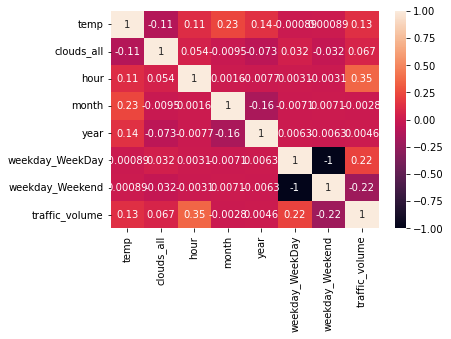

In [44]:
sns.heatmap(pdf.corr(), annot=True)
plt.show()

### Univariate Feature importance

In [57]:
y = pdf.traffic_volume
df_withoutTrafficVolume = pdf.loc[:, pdf.columns != 'traffic_volume']
X = pdf[df_withoutTrafficVolume.columns]

bestfeatures = SelectKBest(score_func=mutual_info_regression, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(X.columns.size,'Score'))  #print 10 best features


                        Specs     Score
2                        hour  1.362763
0                        temp  0.400780
3                       month  0.182249
15            weekday_Weekend  0.125919
14            weekday_WeekDay  0.125374
4                        year  0.115727
1                  clouds_all  0.106284
6         weather_main_Clouds  0.023737
5          weather_main_Clear  0.016262
8            weather_main_Fog  0.010127
13               holiday_True  0.002788
12              holiday_False  0.001810
10          weather_main_Snow  0.000959
11  weather_main_Thunderstorm  0.000848
7        weather_main_Drizzle  0.000000
9           weather_main_Rain  0.000000


### Linear Regression Feature Importance

Feature: holiday_True, Score: -762.70943
Feature: weekday_Weekend, Score: -476.45085
Feature: weather_main_Thunderstorm, Score: -358.12832
Feature: weather_main_Rain, Score: -20.94477
Feature: month, Score: -13.46513
Feature: weather_main_Drizzle, Score: -5.52231
Feature: year, Score: -0.30412
Feature: clouds_all, Score: 2.20717
Feature: weather_main_Snow, Score: 8.64471
Feature: temp, Score: 17.02233
Feature: weather_main_Fog, Score: 19.08867
Feature: weather_main_Clear, Score: 37.04474
Feature: hour, Score: 93.90209
Feature: weather_main_Clouds, Score: 319.81728
Feature: weekday_WeekDay, Score: 476.45085
Feature: holiday_False, Score: 762.70943


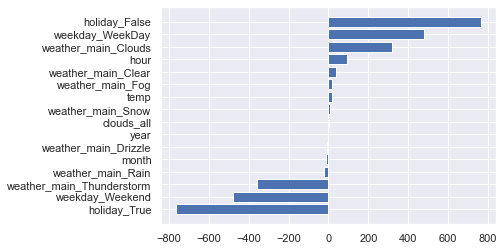

In [58]:
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = sorted(zip(model.coef_, X.columns), key = lambda x: x[0])
# summarize feature importance
for coef, feat in importance:
	print('Feature: %s, Score: %.5f' % (feat, coef))
# plot feature importance
pyplot.barh([x[1] for x in importance], [x[0] for x in importance])
pyplot.show()


### CART Decision Tree Feature Importance

Feature: holiday_False, Score: 0.00000
Feature: holiday_True, Score: 0.00002
Feature: weather_main_Thunderstorm, Score: 0.00012
Feature: weather_main_Drizzle, Score: 0.00012
Feature: weather_main_Rain, Score: 0.00047
Feature: weather_main_Snow, Score: 0.00051
Feature: weather_main_Clear, Score: 0.00094
Feature: weather_main_Fog, Score: 0.00098
Feature: weather_main_Clouds, Score: 0.00236
Feature: clouds_all, Score: 0.00679
Feature: year, Score: 0.00999
Feature: weekday_WeekDay, Score: 0.01068
Feature: month, Score: 0.01141
Feature: temp, Score: 0.04341
Feature: weekday_Weekend, Score: 0.08487
Feature: hour, Score: 0.82735


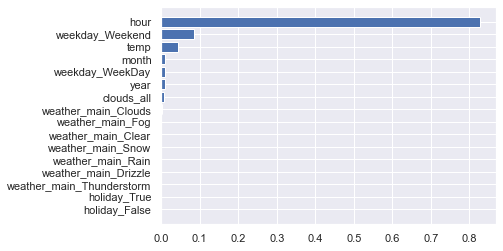

In [59]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = sorted(zip(model.feature_importances_, X.columns), key = lambda x: x[0])

# summarize feature importance
for coef, feat in importance:
 print('Feature: %s, Score: %.5f' % (feat, coef))
# plot feature importance
pyplot.barh([x[1] for x in importance], [x[0] for x in importance])
pyplot.show()


### Random Forest Regression Feature Importance

In [60]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: hour                 Importance: 0.83
Variable: weekday_Weekend      Importance: 0.08
Variable: temp                 Importance: 0.04
Variable: clouds_all           Importance: 0.01
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.01
Variable: weekday_WeekDay      Importance: 0.01
Variable: weather_main_Clear   Importance: 0.0
Variable: weather_main_Clouds  Importance: 0.0
Variable: weather_main_Drizzle Importance: 0.0
Variable: weather_main_Fog     Importance: 0.0
Variable: weather_main_Rain    Importance: 0.0
Variable: weather_main_Snow    Importance: 0.0
Variable: weather_main_Thunderstorm Importance: 0.0
Variable: holiday_False        Importance: 0.0
Variable: holiday_True         Importance: 0.0


### The best model's hyperparameters tuning

## Decision tree regressor hyperparameters

In [22]:
tree_reg = DecisionTreeRegressor()
param_grid = [
    {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
]
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)
grid_search.best_params_

{'max_depth': 17, 'min_samples_leaf': 50}

In [ ]:
forest_reg = RandomForestRegressor()
param_grid = [
    {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300],
     'n_estimators': [10, 20 ,50, 75, 100]}
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)
grid_search.best_params_

In [ ]:
forest_reg = RandomForestRegressor()
param_grid = [
    {'max_depth': [17, 20], 'min_samples_leaf': [10],
     'n_estimators': [100, 200, 300]}
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)
grid_search.best_params_

In [20]:
#SSS
models = {
    'best_linear_regression_hyperparameters': LinearRegression(),
    'best random_forest_regressor_hyperparameters': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor_hyperparameters': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table2=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table2.head(10)

,model,r2_score training,r2_score test,MSE training,MSE test
1,best_linear_regression_hyperparameters,0.191354,0.186537,1785.889553,1793.907616
2,best random_forest_regressor_hyperparameters,0.951741,0.941161,436.279077,482.464286
3,best decision_tree_regresor_hyperparameters,0.935347,0.932637,504.973933,516.229568


### Plot learning curves - sporo izracunavanje -  veoma reprezentativno ali sporo - time is money

In [ ]:
def plot_learning_curves(model, X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("iteration")
    plt.ylabel("error")

plot_learning_curves(DecisionTreeRegressor(max_depth=15, min_samples_leaf=50), train_features, train_labels)
plot_learning_curves(RandomForestRegressor(max_depth=17, n_estimators=50, min_samples_leaf=10), train_features, train_labels)

## Visualization of predictions

### Visualize Decision Tree Regressor predictions

### Function for plotting predictions

In [19]:
#SSS
def plot_prediction(df, number_of_samples):
    sample = df.sample(n=number_of_samples)
    sample['difference'] = np.abs(df.traffic_volume - df.traffic_volume_pred)
    x= [i+1 for i in range(number_of_samples)]
    plt.scatter(x, sample.traffic_volume, color='blue', marker='*', label='traffic_volume')
    plt.scatter(x, sample.traffic_volume_pred, color='red', marker='o',
               label='_pred')
    for x_i, y_i, diff in zip(x, sample.traffic_volume_pred, sample.difference):
        plt.text(x_i+0.05, y_i, int(diff), color="green", fontsize=12)
    plt.scatter([], [], color='green', marker='$123$', label='difference')
    plt.legend()
    plt.xticks(x)
    plt.grid()
    plt.xlabel('sample number')
    plt.ylabel('traffic')
    plt.title("Comparison of actual and predicted values")
    plt.savefig('traffic_volume_vs_traffic_volume_pred.png')

In [21]:
#SSS
def plot_prediction(df, number_of_samples):
    sample = df.sample(n=number_of_samples)
    sample['difference'] = np.abs(df.traffic_volume - df.traffic_volume_pred)
    x= [i+1 for i in range(number_of_samples)]
    plt.scatter(x, sample.traffic_volume, color='blue', marker='*', label='traffic_volume')
    plt.scatter(x, sample.traffic_volume_pred, color='red', marker='o',
               label='_pred')
    for x_i, y_i, diff in zip(x, sample.traffic_volume_pred, sample.difference):
        plt.text(x_i+0.05, y_i, int(diff), color="green", fontsize=12)
    plt.scatter([], [], color='green', marker='$123$', label='difference')
    plt.legend()
    plt.xticks(x)
    plt.grid()
    plt.xlabel('sample number')
    plt.ylabel('traffic')
    plt.title("Comparison of actual and predicted values")
    plt.savefig('traffic_volume_vs_traffic_volume_pred.png')

In [22]:
df_test_predictions =pd.DataFrame(test_labels, columns={"traffic_volume"})

   traffic_volume  traffic_volume_pred
0            4083          4325.382716
1            1172          1727.483333
2            4548          4869.161765
3            3173          2637.340000
4            5575          5352.888889


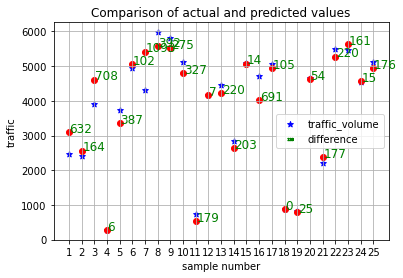

In [23]:
#SSS
traffic_volume_train_pred = models['best decision_tree_regresor_hyperparameters'].predict(train_features)
traffic_volume_test_pred = models['best decision_tree_regresor_hyperparameters'].predict(test_features)
df_train_pred =  pd.DataFrame(train_labels, columns={"traffic_volume"})

df_train_pred['traffic_volume_pred'] = traffic_volume_train_pred
df_test_pred =pd.DataFrame(test_labels, columns={"traffic_volume"})
df_test_pred['traffic_volume_pred'] = traffic_volume_test_pred
df_test_predictions['pred_bDTR_H'] = traffic_volume_test_pred
print(df_test_pred.head())
plot_prediction(df_test_pred, 25)

### Visualize Random forest Regressor predictions

   traffic_volume  traffic_volume_pred
0            4083          4332.316863
1            1172          1707.421775
2            4548          4651.229570
3            3173          2478.893769
4            5575          5492.303345


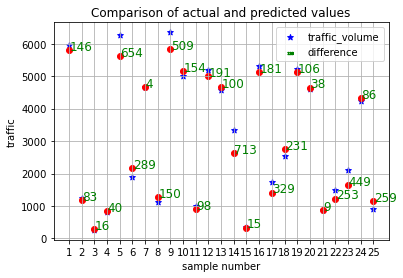

In [24]:
#SSS
traffic_volume_train_predrf = models['best random_forest_regressor_hyperparameters'].predict(train_features)
traffic_volume_test_predrf = models['best random_forest_regressor_hyperparameters'].predict(test_features)
df_train_predrf =  pd.DataFrame(train_labels, columns={"traffic_volume"})

df_train_predrf['traffic_volume_pred'] = traffic_volume_train_predrf
df_test_predrf =pd.DataFrame(test_labels, columns={"traffic_volume"})
df_test_predrf['traffic_volume_pred'] = traffic_volume_test_predrf
df_test_predictions['pred_bRFR_H'] = traffic_volume_test_pred

print(df_test_predrf.head())
plot_prediction(df_test_predrf, 25)

### Showing predictions of regression algorithms with tuned hyperparameters

In [25]:
df_test_predictions.head(10)


,traffic_volume,pred_bDTR_H,pred_bRFR_H
0,4083,4325.382716,4325.382716
1,1172,1727.483333,1727.483333
2,4548,4869.161765,4869.161765
3,3173,2637.340000,2637.340000
4,5575,5352.888889,5352.888889
5,4295,4185.538462,4185.538462
6,4876,4893.666667,4893.666667
7,5294,5310.543860,5310.543860
8,2298,2468.914286,2468.914286
9,5250,5580.760417,5580.760417


## Feature Selection

### data split

In [26]:
df_withoutTrafficVolume = df.loc[:, pdf.columns != 'traffic_volume']
X = df[df_withoutTrafficVolume.columns]

# Separating the data into training and tests set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    df['traffic_volume'],
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape




((36145, 16), (12049, 16), (36145,), (12049,))

### Feature selection using Variance Threshold

In [106]:
#SSS
#this showing that weekend and workday are important features, on 0.20 variance threshold said that they are important
var_thr = VarianceThreshold(threshold = 0.20) #Removing both constant and quasi-constant
var_thr.fit(X_train)

var_thr.get_support()

concol = [column for column in X_train.columns 
          if column not in X_train.columns[var_thr.get_support()]]
goodCol = [column for column in X_train.columns 
          if column in X_train.columns[var_thr.get_support()]]

print("Bad features:")
for features in concol:
    print(features)


print()
print("Good features:")
for features in goodCol:
    print(features)



Bad features:
weather_main_Drizzle
weather_main_Fog
weather_main_Rain
weather_main_Snow
weather_main_Thunderstorm
holiday_False
holiday_True

Good features:
temp
clouds_all
hour
month
year
weather_main_Clear
weather_main_Clouds
weekday_WeekDay
weekday_Weekend


### Drop bad columns

In [107]:
#SSS
Variance_train_X = X_train.drop(concol, axis=1)
Variance_test_X = X_test.drop(concol, axis=1)

In [108]:
Variance_train_X.columns, Variance_test_X.columns

(Index(['temp', 'clouds_all', 'hour', 'month', 'year', 'weather_main_Clear',
        'weather_main_Clouds', 'weekday_WeekDay', 'weekday_Weekend'],
       dtype='object'),
 Index(['temp', 'clouds_all', 'hour', 'month', 'year', 'weather_main_Clear',
        'weather_main_Clouds', 'weekday_WeekDay', 'weekday_Weekend'],
       dtype='object'))

### Manual dropping of weather columns

In [109]:
testList = ['weather_main_Clear', 'weather_main_Clouds']

Variance_train_X = Variance_train_X.drop('weather_main_Clear', axis=1)
Variance_train_X = Variance_train_X.drop('weather_main_Clouds', axis=1)

Variance_test_X = Variance_test_X.drop('weather_main_Clear', axis=1)
Variance_test_X = Variance_test_X.drop('weather_main_Clouds', axis=1)

Variance_train_X.columns, Variance_test_X.columns

(Index(['temp', 'clouds_all', 'hour', 'month', 'year', 'weekday_WeekDay',
        'weekday_Weekend'],
       dtype='object'),
 Index(['temp', 'clouds_all', 'hour', 'month', 'year', 'weekday_WeekDay',
        'weekday_Weekend'],
       dtype='object'))

### Checking results of data processed by variance threshold

In [110]:
models = {
    'best_LR_variance_threshold': LinearRegression(),
    'best RFR_variance_threshold': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best DTR_variance_threshold': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table4 = train_test_various_models( models, Variance_train_X, Variance_test_X, y_train, y_test)
data_table4.head(10)

,model,r2_score training,r2_score test,MSE training,MSE test
1,best_LR_variance_threshold,0.183129,0.184340,1797.790044,1787.819961
2,best RFR_variance_threshold,0.951873,0.938461,436.373694,491.069980
3,best DTR_variance_threshold,0.936330,0.931836,501.913692,516.828444


In [30]:
traffic_volume_train_pred = models['best RFR_variance_threshold'].predict(Variance_train_X)
traffic_volume_test_pred = models['best RFR_variance_threshold'].predict(Variance_test_X)

df_train_pred = pd.DataFrame(y_train, columns={"traffic_volume"})
df_train_pred['traffic_volume_pred'] = traffic_volume_train_pred
df_test_pred = pd.DataFrame(y_test, columns={"traffic_volume"})
df_test_pred['traffic_volume_pred'] = traffic_volume_test_pred
df_test_predictions['pred_bRFR_variance'] = traffic_volume_test_pred
df_test_pred.head()

,traffic_volume,traffic_volume_pred
23483,2714,2830.759619
29504,732,625.008028
2675,6256,5955.470027
3311,2752,2594.309931
44181,351,373.645917


In [31]:
df_test_predictions.head(7)

,traffic_volume,pred_bDTR_H,pred_bRFR_H,pred_bRFR_variance
0,4083,4325.382716,4325.382716,2830.759619
1,1172,1727.483333,1727.483333,625.008028
2,4548,4869.161765,4869.161765,5955.470027
3,3173,2637.340000,2637.340000,2594.309931
4,5575,5352.888889,5352.888889,373.645917
5,4295,4185.538462,4185.538462,550.045988
6,4876,4893.666667,4893.666667,1382.777702


### Feature Selection Using Regularization

In [45]:
# Initialize the RandomForestRegressor model
rf = DecisionTreeRegressor(max_depth=15, min_samples_leaf=50)

# Fit the model to the training data
rf.fit(X_train.fillna(0), y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=50)

In [46]:
# Selecting features using SelectFromModel
sel_ = SelectFromModel(rf)
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=DecisionTreeRegressor(max_depth=15,
                                                min_samples_leaf=50))

In [47]:
print(sel_.get_support())
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format( np.sum(sel_.estimator_.coef_ == 0)))

X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

print(selected_feat, X_train_selected.shape, X_test_selected.shape)


[False False  True False False False False False False False False False
 False False  True False]
total features: 16
selected features: 2
Index(['hour', 'weekday_WeekDay'], dtype='object') (36145, 2) (12049, 2)


In [48]:
models = {
    'best_linear_regression_regularization': LinearRegression(),
    'best random_forest_regressor_reguralization': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor_regularization': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table5=train_test_various_models(models, X_train_selected, X_test_selected, y_train, y_test)
data_table5.head(10)

,model,r2_score training,r2_score test,MSE training,MSE test
1,best_linear_regression_regularization,0.170307,0.174446,1811.844650,1798.630387
2,best random_forest_regressor_reguralization,0.921156,0.920872,558.531147,556.844585
3,best decision_tree_regresor_regularization,0.921157,0.920886,558.527295,556.795187


In [50]:
traffic_volume_train_predrf = models['best random_forest_regressor_reguralization'].predict(
    X_train_selected)
traffic_volume_test_predrf = models['best random_forest_regressor_reguralization'].predict(
    X_test_selected)
df_train_predrf = pd.DataFrame(y_train, columns={"traffic_volume"})

df_train_predrf['traffic_volume_pred'] = traffic_volume_train_predrf
df_test_predrf =pd.DataFrame(y_test, columns={"traffic_volume"})
df_test_predrf['traffic_volume_pred'] = traffic_volume_test_predrf
df_test_predictions['pred_bRFR_Regularization'] = traffic_volume_test_predrf
df_test_predrf.head()

,traffic_volume,traffic_volume_pred
23483,2714,2696.623498
29504,732,652.297541
2675,6256,6219.787914
3311,2752,2387.738721
44181,351,362.606802


### RFE Recursive Feature Elimination

In [35]:
pdf.head()

,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


### Feature rankings

In [36]:
#preparing models for feature rankings
models = {
    'random_forest_regressor': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'decision_tree_regresor': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}

In [37]:
#SSS
def featuresRankingRFE(models, train_features, train_labels):
    column_headers = list(pdf.columns.values)
    column_headers.remove("traffic_volume")
    featuresImportance =  pd.DataFrame(column_headers)
    for model_name, model in models.items():
        rfe = RFE(estimator=model, n_features_to_select=5, step=1)
        rfe.fit(train_features, train_labels)
        featuresImportance[model_name] = rfe.ranking_
    print(featuresImportance)
    
featuresRankingRFE(models, train_features, train_labels)

                            0  random_forest_regressor  decision_tree_regresor
0                        temp                        1                       1
1                  clouds_all                        3                       2
2                        hour                        1                       1
3                       month                        1                       1
4                        year                        2                       1
5          weather_main_Clear                        6                       5
6         weather_main_Clouds                        4                       3
7        weather_main_Drizzle                       11                      12
8            weather_main_Fog                        5                       4
9           weather_main_Rain                        8                       8
10          weather_main_Snow                        7                       6
11  weather_main_Thunderstorm                       

### DON'T TOUCH RFE with real data

In [ ]:
featuresRankingRFE(models, train_features, train_labels)

### Function for drop and split data

In [38]:
#SSS
def dropAndSplitFeatures(featuresToDrop, data):
    features= pdf.drop(columns=featuresToDrop, axis = 1)
    feature_list = list(features.columns)
    

    # Convert to numpy array
    features = np.array(features)
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    return train_features, test_features, train_labels, test_labels, feature_list

In [ ]:
df.head()

### Manual dropping columns reated to weather and holiday

In [39]:
#SSS
cols = [c for c in df.columns if c.lower()[:12] != 'weather_main']

pdf=df[cols]
cols = [c for c in pdf.columns if c.lower()[:7] != 'holiday']

pdf=pdf[cols]
pdf.head()

,temp,clouds_all,hour,month,year,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,1.0,0.0,5545
1,289.36,75,10,10,2012,1.0,0.0,4516
2,289.58,90,11,10,2012,1.0,0.0,4767
3,290.13,90,12,10,2012,1.0,0.0,5026
4,291.14,75,13,10,2012,1.0,0.0,4918


### Checking results of data with minimum features possible

In [40]:
pdf.head()

,temp,clouds_all,hour,month,year,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,1.0,0.0,5545
1,289.36,75,10,10,2012,1.0,0.0,4516
2,289.58,90,11,10,2012,1.0,0.0,4767
3,290.13,90,12,10,2012,1.0,0.0,5026
4,291.14,75,13,10,2012,1.0,0.0,4918


In [41]:
#SSS
pdf=pdf.copy()
# u ovom koraku je dokazano da su year i clouds_all bitni faktori u izracunavanju, naravno ako se uzme u obzir da ako se izbace rezultati su losiji za 1%
# sto je prihvatljivo uciniti obzirom na to da se gube dva feature-a od po 48k podataka - brzina znatno veca - placanje cene tacnosti radi brzine! sa(21.1) vs bez(17.4)
train_features, test_features, train_labels, test_labels, feature_list = dropAndSplitFeatures(['traffic_volume'], pdf)
#train_test_various_models(models, train_features, test_features, train_labels, test_labels)

models = {
    'best_linear_regression_less_features': LinearRegression(),
    'best random_forest_regressor_less_features': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor_less_features': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table3=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table3.head()

,model,r2_score training,r2_score test,MSE training,MSE test
1,best_linear_regression_less_features,0.184748,0.179722,1793.170364,1801.406836
2,best random_forest_regressor_less_features,0.951210,0.940722,438.674706,484.258590
3,best decision_tree_regresor_less_features,0.935227,0.932373,505.443585,517.240657


In [51]:
df_test_predictions.head(7)

,traffic_volume,pred_bDTR_H,pred_bRFR_H,pred_bRFR_variance,pred_bRFR_Regularization
0,4083,4325.382716,4325.382716,2830.759619,2696.623498
1,1172,1727.483333,1727.483333,625.008028,652.297541
2,4548,4869.161765,4869.161765,5955.470027,6219.787914
3,3173,2637.340000,2637.340000,2594.309931,2387.738721
4,5575,5352.888889,5352.888889,373.645917,362.606802
5,4295,4185.538462,4185.538462,550.045988,607.426620
6,4876,4893.666667,4893.666667,1382.777702,1312.790479


In [52]:
#SSS
data_table=pd.concat([data_table1,data_table2])
data_table=pd.concat([data_table,data_table3])
data_table=pd.concat([data_table,data_table4])
data_table=pd.concat([data_table,data_table5])
data_table.head(15)

,model,r2_score training,r2_score test,MSE training,MSE test
1,linear_regression,0.191354,0.186537,1785.889553,1793.907616
2,random_forest_regressor,0.903947,0.905969,615.505382,609.909940
3,decision_tree_regresor,0.903681,0.905682,616.355422,610.842409
1,best_linear_regression_hyperparameters,0.191354,0.186537,1785.889553,1793.907616
2,best random_forest_regressor_hyperparameters,0.951741,0.941161,436.279077,482.464286
3,best decision_tree_regresor_hyperparameters,0.935347,0.932637,504.973933,516.229568
1,best_linear_regression_less_features,0.184748,0.179722,1793.170364,1801.406836
2,best random_forest_regressor_less_features,0.951210,0.940722,438.674706,484.258590
3,best decision_tree_regresor_less_features,0.935227,0.932373,505.443585,517.240657
1,best_LR_variance_threshold,0.189354,0.186478,1790.927158,1785.475859


### o=pokusaj nad osnovnim podacima

In [ ]:
pdf=df.copy()
train_features, test_features, train_labels, test_labels, feature_list = dropAndSplitFeatures(['traffic_volume', 'snow_1h', 'rain_1h', 'holiday', 'clouds_all' ], pdf)
#train_test_various_models(models, train_features, test_features, train_labels, test_labels)

models = {
    'best_linear_regression_less_features': LinearRegression(),
    'best random_forest_regressor_less_features': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor_less_features': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table3=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table3.head()


In [ ]:
print(feature_list)